In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error, median_absolute_error
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import Ridge,RidgeCV

In [2]:
data = pd.read_csv("Taiwan11.csv").dropna(axis=0)
data['x2'] = data['x2'].astype('float64')
data['x3'] = data['x3'].astype('float64')
data['x4'] = data['x4'].astype('float64')
data['x5'] = data['x5'].astype('float64')
data['x6'] = data['x6'].astype('float64')
data['x7'] = data['x7'].astype('float64')
data['x8'] = data['x8'].astype('float64')
data['x9'] = data['x9'].astype('float64')
data['x10'] = data['x10'].astype('float64')
data['x13'] = data['x13'].astype('float64')
data['y'] = data['y'].astype('float64')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,2288.0,1052.0,2240.0,2027.0,2247.0,2248.0,127203.0,346047.0,4267.0,16008.0,6.0,10.0,1737.0,122435.0,550099.0
1,2296.0,1071.0,2467.0,2193.0,2146.0,2280.0,140456.0,360667.0,4660.0,17339.0,6.0,10.0,1271.0,129105.0,577869.0
2,2304.0,1085.0,2556.0,2404.0,1972.0,2292.0,139777.0,354099.0,4961.0,17604.0,7.0,11.0,985.0,126202.0,562439.0
3,2312.0,1092.0,2746.0,2512.0,1673.0,2303.0,114496.0,301443.0,3780.0,15303.0,7.0,10.0,923.0,124811.0,558565.0
4,2316.0,1107.0,3083.0,2814.0,1607.0,2307.0,147160.0,363712.0,5258.0,16222.0,8.0,11.0,973.0,135521.0,605921.0


In [3]:
des = data.describe()
outputfile = '/Users/huwentao/PythonWorkSpace/Revenue_Analysis/describe.xls'
des.to_excel(outputfile)

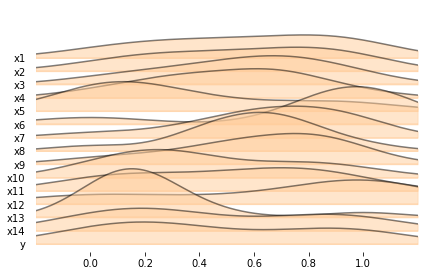

In [4]:
from sklearn.preprocessing import MinMaxScaler
#实现归一化
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(data) #fit，在这里本质是生成min(x)和max(x)
data_scale = pd.DataFrame(scaler.transform(data)) #通过接口导出结果
data_scale.columns = data.columns
fig, axes = joypy.joyplot(data_scale, alpha=.5, color='#FFCC99')#连续值的列为一个"脊"


<AxesSubplot:>

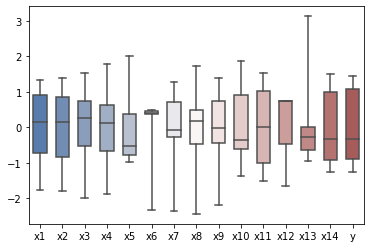

In [6]:
Scaler = StandardScaler().fit(data)
data_norm = Scaler.transform(data)
data_norm = pd.DataFrame(data_norm)
data_norm.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','y']
sns.boxplot(data=data_norm,  whis=[0, 100], width=.6, palette="vlag")

In [17]:
sns.set_theme(style="white")

g = sns.PairGrid(data.loc[:,['x4','x5','y']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

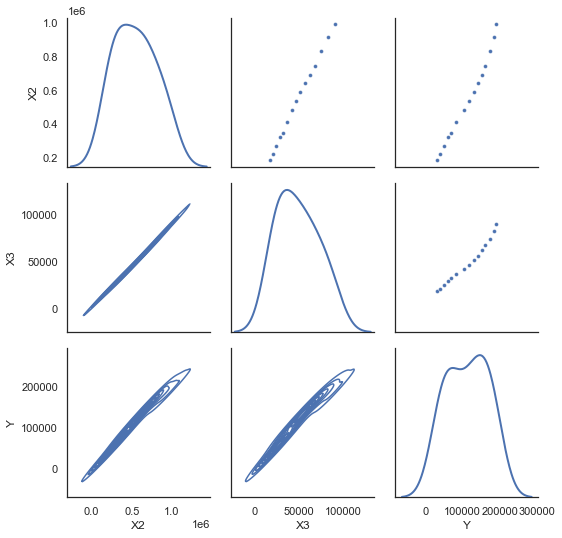

In [19]:
sns.set_theme(style="white")

g = sns.PairGrid(data.loc[:,['X2','X3','Y']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

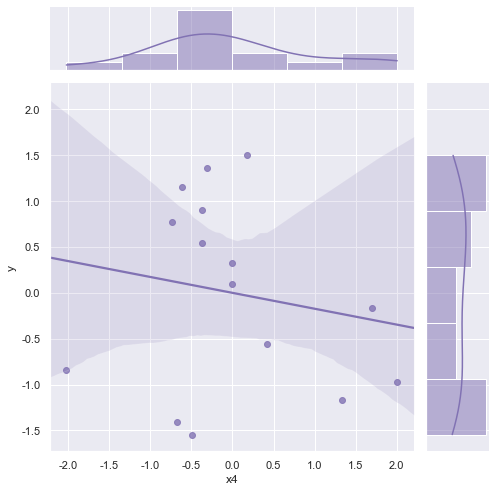

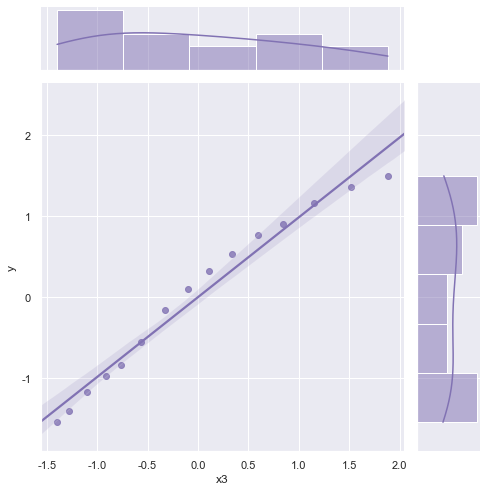

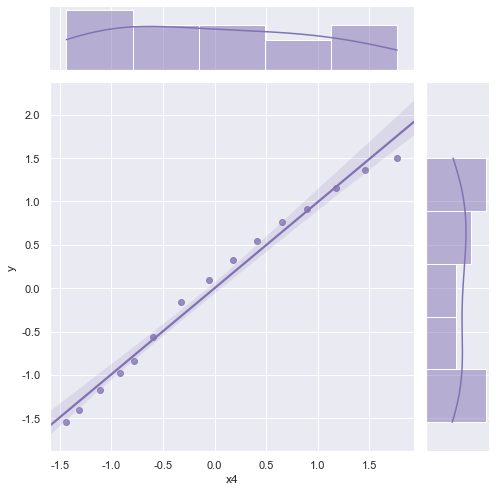

In [20]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="x4", y="y", data=data_norm,
                  kind="reg", truncate=False,
                  color="m", height=7)
g2 = sns.jointplot(x="x3", y="y", data=data_norm,
                  kind="reg", truncate=False,
                  color="m", height=7)
data_norm1 = data_norm
data_norm1['x4'] = data_norm['x6']
g3 = sns.jointplot(x="x4", y="y", data=data_norm1,
                  kind="reg", truncate=False,
                  color="m", height=7)

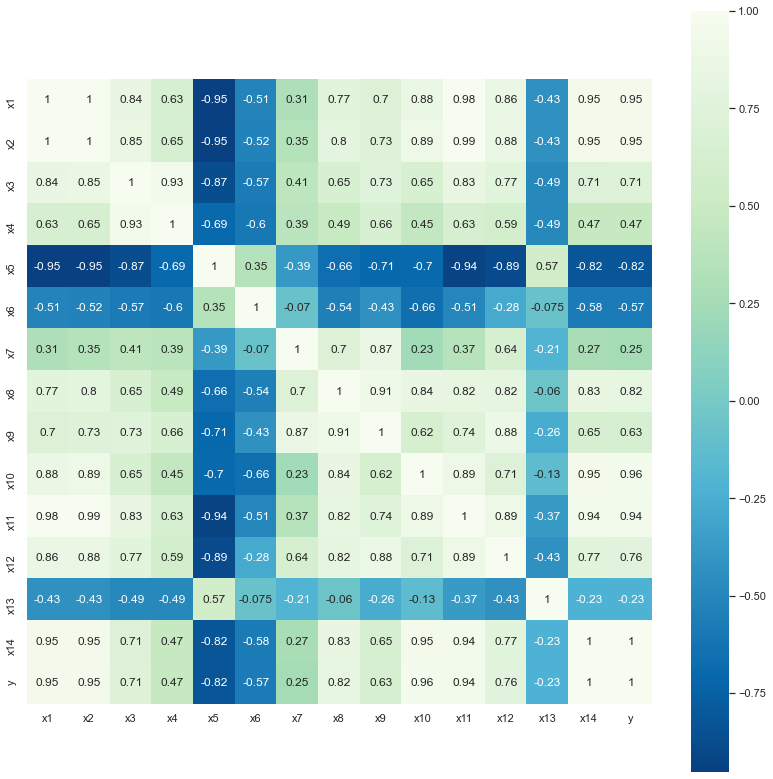

In [247]:
# 相关度
corr = data.corr(method = "pearson")
plt.figure(figsize=(14,14))
# 相关度热力图
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)
plt.show()

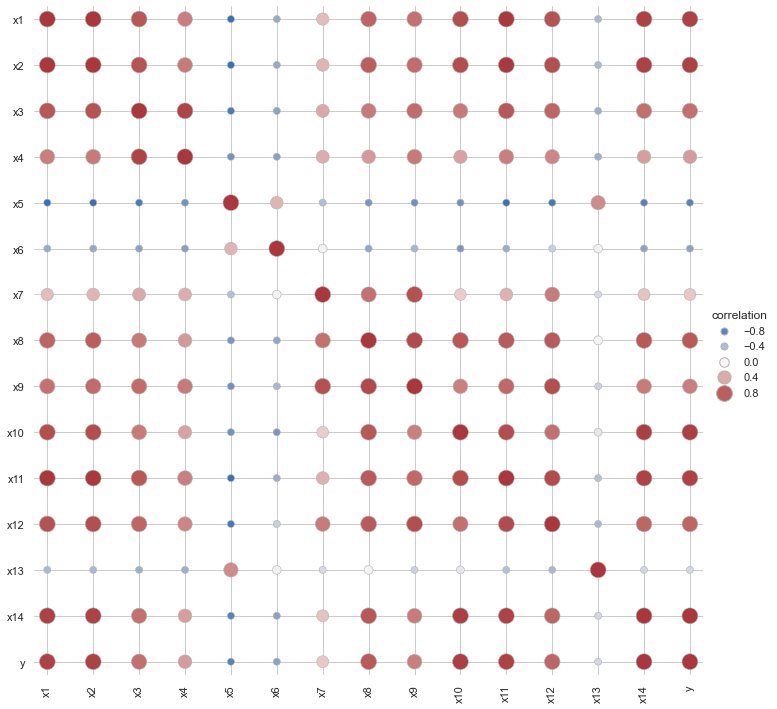

In [248]:
sns.set_theme(style="whitegrid")

# Compute a correlation matrix and convert to long-form
corr_mat = corr.stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [249]:
lasso = Lasso(1000)
lasso.fit(data.iloc[:,0:15], data['y'])
cells = pd.DataFrame()
cells['coefficients'] = data.columns[0:14]
cells['values'] = lasso.coef_[0:14]
cells['iters'] = lasso.n_iter_
cells

,coefficients,values,iters
0,x1,-0.000000,1000
1,x2,-0.000000,1000
2,x3,2.720291,1000
3,x4,-0.038089,1000
4,x5,3.876958,1000
5,x6,0.921346,1000
6,x7,-0.153341,1000
7,x8,0.026913,1000
8,x9,1.855000,1000
9,x10,-0.218583,1000


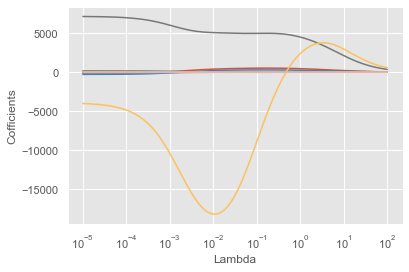

No handles with labels found to put in legend.


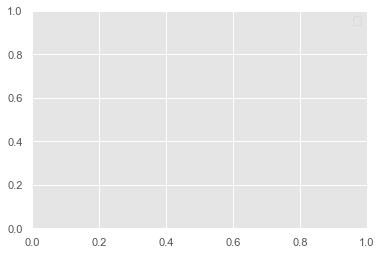

In [250]:
features = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14'] 
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    data[features], 
                                    data['y'], 
                                    test_size = 0.2, 
                                    random_state = 1234 )

Lambdas = np.logspace(-5, 2, 200)
ridge_cofficients = []
# 循环迭代不同的Lambda值
for Lambda in Lambdas:
    ridge = Ridge(alpha = Lambda, normalize=True)
    # 系数求解函数
    ridge.fit(X_train, y_train)
    # 权重向量
    ridge_cofficients.append(ridge.coef_)
plt.style.use('ggplot')
plt.plot(Lambdas, ridge_cofficients, label = 'features')
# 对x轴作对数变换
plt.xscale('log')
# 设置折线图x轴和y轴标签
plt.xlabel('Lambda')
plt.ylabel('Cofficients')
# 图形显示
plt.show()
plt.legend()

In [258]:
mask = lasso.coef_ != 0 # return none-zero array
new_reg_data = data.iloc[:, mask]
new_reg_data

,x3,x4,x5,x6,x7,x8,x9,x10,x13,x14,y
0,2240.0,2027.0,2247.0,2248.0,127203.0,346047.0,4267.0,16008.0,1737.0,122435.0,550099.0
1,2467.0,2193.0,2146.0,2280.0,140456.0,360667.0,4660.0,17339.0,1271.0,129105.0,577869.0
2,2556.0,2404.0,1972.0,2292.0,139777.0,354099.0,4961.0,17604.0,985.0,126202.0,562439.0
3,2746.0,2512.0,1673.0,2303.0,114496.0,301443.0,3780.0,15303.0,923.0,124811.0,558565.0
4,3083.0,2814.0,1607.0,2307.0,147160.0,363712.0,5258.0,16222.0,973.0,135521.0,605921.0
5,3012.0,2705.0,1499.0,2320.0,155638.0,380032.0,5897.0,17646.0,1048.0,137091.0,607818.0
6,3054.0,2699.0,1364.0,2328.0,150615.0,377480.0,5717.0,17967.0,1068.0,140771.0,624455.0
7,3201.0,2740.0,1281.0,2346.0,149453.0,385387.0,5753.0,18341.0,1055.0,145606.0,641711.0
8,2853.0,2372.0,1309.0,2362.0,155480.0,403681.0,5877.0,19761.0,1056.0,166214.0,710407.0
9,2803.0,2306.0,1269.0,2374.0,138029.0,389801.0,5226.0,21349.0,980.0,167707.0,737393.0


<ipython-input-259-2f34e1123d6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reg_data[u'y_pred_LR'] = clf.predict(new_reg_data[features])


0.991734989953814


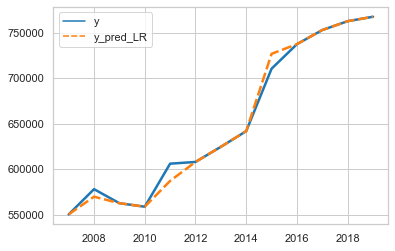

In [259]:
#LInear Regression
features = ['x3','x4','x5','x6','x7','x8','x9','x10','x13','x14'] 
new_reg_data.index = range(2007,2020)
X_train,X_test,y_train,y_test = train_test_split(new_reg_data[features],new_reg_data['y'],test_size=0.2,random_state=125)
clf = LinearRegression().fit(X_train,y_train)
new_reg_data[u'y_pred_LR'] = clf.predict(new_reg_data[features])
sns.set_theme(style="whitegrid")
sns.lineplot(data=new_reg_data[['y','y_pred_LR']], palette="tab10", linewidth=2.5)
print(r2_score(new_reg_data['y'].values,new_reg_data['y_pred_LR'].values))

<ipython-input-260-3d4a0988d56e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reg_data[u'y_pred_DT'] = dtr.predict(new_reg_data[features])


0.9143337957783969


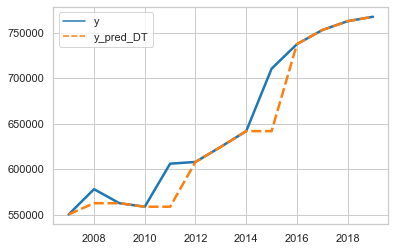

In [260]:
# Decision Tree
features = ['x3','x4','x5','x6','x7','x8','x9','x10','x13','x14'] 
dtr = DecisionTreeRegressor().fit(X_train,y_train)
new_reg_data[u'y_pred_DT'] = dtr.predict(new_reg_data[features])
sns.set_theme(style="whitegrid")
sns.lineplot(data=new_reg_data[['y','y_pred_DT']], palette="tab10", linewidth=2.5)
print(r2_score(new_reg_data['y'].values,new_reg_data['y_pred_DT'].values))

In [252]:
def GM11(x0): 
    x1 = x0.cumsum()
    z1 = (x1[:len(x1)-1] + x1[1:])/2.0 
    z1 = z1.reshape((len(z1),1))
    B = np.append(-z1, np.ones_like(z1), axis = 1)
    Yn = x0[1:].reshape((len(x0)-1, 1))
    [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) 
    f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)
    delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
    C = delta.std()/x0.std()
    P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
    return f, a, b, x0[0], C, P 

In [253]:
new_reg_data.index = range(2007,2020)
new_reg_data.loc[2020] = None
new_reg_data.loc[2021] = None
l =['x3','x4','x5','x6','x7','x8','x9','x10','x13','x14']
C = []
P = []
lev=[]
level1,level2=0,0
for i in l:
    f = GM11(new_reg_data.loc[range(2007,2020),i].values)[0]
    new_reg_data.loc[2020,i] = f(len(new_reg_data) -1)
    new_reg_data.loc[2021,i] = f(len(new_reg_data))
    new_reg_data[i] = new_reg_data[i].round(2)
    if GM11(new_reg_data.loc[range(2007,2020),i].values)[4]<=0.35:
        level1 = 100
    elif GM11(new_reg_data.loc[range(2007,2020),i].values)[4]>0.35 and GM11(new_reg_data.loc[range(2007,2020),i].values)[4]<=0.5:
        level1 = 80
    elif GM11(new_reg_data.loc[range(2007,2020),i].values)[4]>0.5 and GM11(new_reg_data.loc[range(2007,2020),i].values)[4]<=0.65:
        level1 = 40
    else:
        level1 = 20
    if GM11(new_reg_data.loc[range(2007,2020),i].values)[5]>=0.95:
        level2= 100
    elif GM11(new_reg_data.loc[range(2007,2020),i].values)[5]>=0.8 and GM11(new_reg_data.loc[range(2007,2020),i].values)[5]<0.95:
        level2 = 80
    elif GM11(new_reg_data.loc[range(2007,2020),i].values)[5]>=0.7 and GM11(new_reg_data.loc[range(2007,2020),i].values)[5]<0.8:
        level2 = 40
    else:
        level2 = 20
    if max(level1,level2) == 100:
        lev.append('Excellent')
    elif max(level1,level2) == 80:
        lev.append('Good')
    elif max(level1,level2) == 40:
        lev.append('Normal')
    else:
        lev.append('bad')      
    C.append(GM11(new_reg_data.loc[range(2007,2020),i].values)[4])
    P.append(GM11(new_reg_data.loc[range(2007,2020),i].values)[5])
    
y = list(data['y'].values)
y.extend([np.nan,np.nan])
#new_reg_data['y'] = y
outputfile = '/Users/huwentao/PythonWorkSpace/Revenue_Analysis/new_reg_data_GM11.xls'
new_reg_data.to_excel(outputfile)
print(new_reg_data.loc[2020:2021, :])
new_reg_data

           x3       x4       x5       x6         x7         x8       x9  \
2020  3434.49  2860.00  1016.38  1268.52  145762.00  424246.02  6136.63   
2021  3512.09  2901.84   961.59  1190.58  146277.98  432056.12  6269.69   

           x10      x13        x14   y  
2020  24199.45  1084.84  188479.19 NaN  
2021  25115.36  1088.83  195505.12 NaN  


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-253-db7be77e32de>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reg_data.loc[2020,i] = f(len(new_reg_data) -1)
<ipython-input-253-db7be77e32de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reg_data.loc[2021,i] = f(len(new_reg_data))
<ipython-inpu

,x3,x4,x5,x6,x7,x8,x9,x10,x13,x14,y
2007,2240.00,2027.00,2247.00,2248.00,127203.00,346047.00,4267.00,16008.00,1737.00,122435.00,550099.0
2008,2467.00,2193.00,2146.00,2280.00,140456.00,360667.00,4660.00,17339.00,1271.00,129105.00,577869.0
2009,2556.00,2404.00,1972.00,2292.00,139777.00,354099.00,4961.00,17604.00,985.00,126202.00,562439.0
2010,2746.00,2512.00,1673.00,2303.00,114496.00,301443.00,3780.00,15303.00,923.00,124811.00,558565.0
2011,3083.00,2814.00,1607.00,2307.00,147160.00,363712.00,5258.00,16222.00,973.00,135521.00,605921.0
2012,3012.00,2705.00,1499.00,2320.00,155638.00,380032.00,5897.00,17646.00,1048.00,137091.00,607818.0
2013,3054.00,2699.00,1364.00,2328.00,150615.00,377480.00,5717.00,17967.00,1068.00,140771.00,624455.0
2014,3201.00,2740.00,1281.00,2346.00,149453.00,385387.00,5753.00,18341.00,1055.00,145606.00,641711.0
2015,2853.00,2372.00,1309.00,2362.00,155480.00,403681.00,5877.00,19761.00,1056.00,166214.00,710407.0
2016,2803.00,2306.00,1269.00,2374.00,138029.00,389801.00,5226.00,21349.00,980.00,167707.00,737393.0


In [254]:
pred = pd.DataFrame()
pred['index'] = ['x3','x4','x5','x6','x7','x8','x9','x10','x13','x14']
pred['2020'] = new_reg_data.loc[2020,:].values[0:10]
pred['2021'] = new_reg_data.loc[2021,:].values[0:10]
pred['C'] = C
pred['P'] = P
pred['level']= lev
outputfile = '/Users/huwentao/PythonWorkSpace/Revenue_Analysis/grey_prediction_evaluation.xls'
pred.to_excel(outputfile)
pred

,index,2020,2021,C,P,level
0,x3,3434.49,3512.09,0.298011,1.000000,Excellent
1,x4,2860.00,2901.84,0.396401,0.923077,Good
2,x5,1016.38,961.59,0.138563,1.000000,Excellent
3,x6,1268.52,1190.58,0.494621,0.846154,Good
4,x7,145762.00,146277.98,0.585420,0.769231,Normal
5,x8,424246.02,432056.12,0.410857,0.923077,Good
6,x9,6136.63,6269.69,0.427010,0.923077,Good
7,x10,24199.45,25115.36,0.192213,1.000000,Excellent
8,x13,1084.84,1088.83,0.908888,0.923077,Good
9,x14,188479.19,195505.12,0.135645,1.000000,Excellent


0.8573223137943518


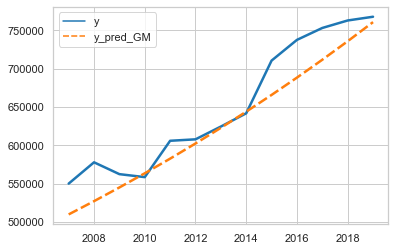

In [255]:
a = GM11(new_reg_data.loc[range(2007,2020),'y'].values)[0]
dat = pd.DataFrame()
dat['y'] = new_reg_data['y'][0:13]
arr = []
for i in range(0,13):
    arr.append(a(i))
dat['y_pred_GM'] = arr
sns.set_theme(style="whitegrid")
sns.lineplot(data=dat[['y','y_pred_GM']], palette="tab10", linewidth=2.5)
print(r2_score(dat['y'][0:13],dat['y_pred_GM'][0:13]))

0.9965253071681268


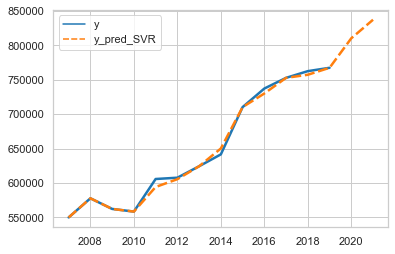

In [162]:
inputfile = '/Users/huwentao/PythonWorkSpace/Revenue_Analysis/new_reg_data_GM11.xls'
data = pd.read_excel(inputfile)
data.index = range(2007,2022)
# data.drop(labels='X11',inplace=True,axis=1) # Delete normal level creatures x11
feature =['x3','x4','x5','x6','x7','x8','x9','x10','x13','x14']
data_train = data.loc[range(2007,2020)]
data_mean = data_train.mean()
data_std = data_train.std()
data_train = (data_train - data_mean) / data_std #standarlization
x_train = data_train[feature].values
y_train = data_train['y'].values
# SVR
linearsvr = LinearSVR()   
linearsvr.fit(x_train,y_train)
x = ((data[feature] - data_mean[feature])/data_std[feature]).values 
data[u'y_pred_SVR'] = linearsvr.predict(x) * data_std['y'] + data_mean['y']
sns.set_theme(style="whitegrid")
sns.lineplot(data=data[['y','y_pred_SVR']], palette="tab10", linewidth=2.5)
print(r2_score(data['y'][0:13],data['y_pred_SVR'][0:13]))
outputfile = '/Users/huwentao/PythonWorkSpace/Revenue_Analysis/new_reg_data_GM11_revenue.xls'
data.to_excel(outputfile)

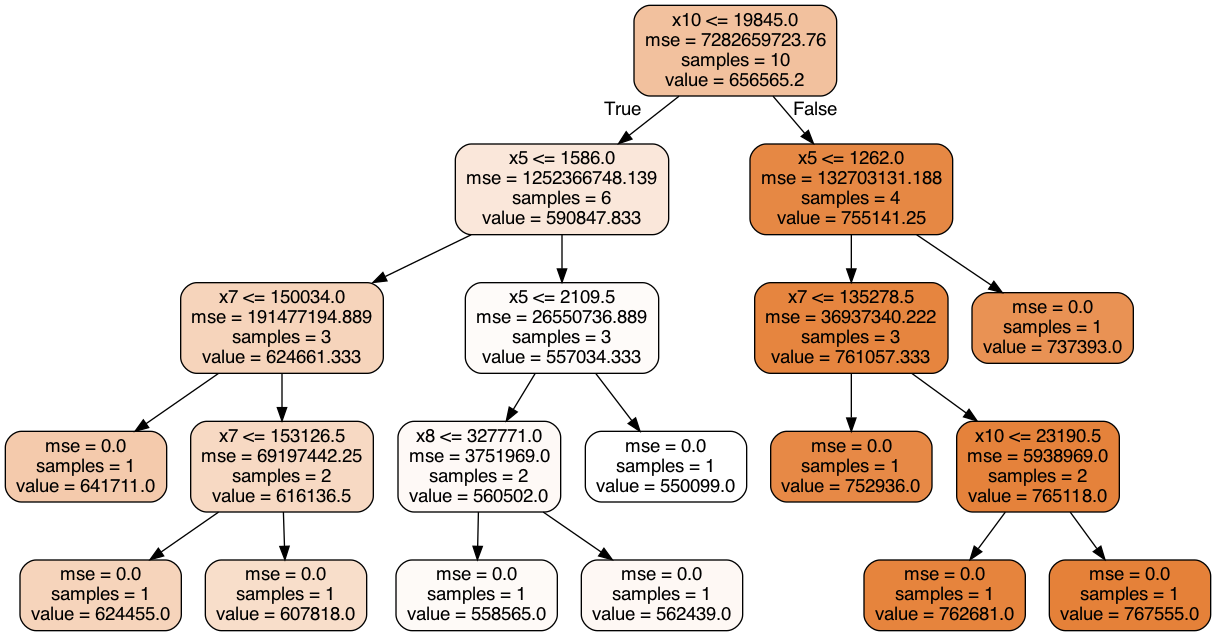

In [156]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'D:\Anaconda\graphviz-2.38\release\bin'
from IPython.display import Image  
import pydotplus
features = ['x3','x4','x5','x6','x7','x8','x9','x10','x13','x14']
classes=['lower_price','higher_price']
# 定义图像
from sklearn import tree
tree_graph_data = tree.export_graphviz(dtr,
                    feature_names=features,
                     class_names=classes,
                    filled=True,
                    rounded=True)
# 绘图：
tree_graph = pydotplus.graph_from_dot_data(tree_graph_data)
Image(tree_graph.create_png())

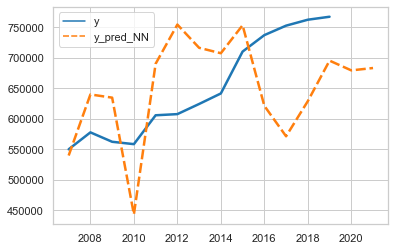

In [192]:

inputfile = '/Users/huwentao/PythonWorkSpace/Revenue_Analysis/new_reg_data_GM11.xls'
data_1 = pd.read_excel(inputfile)
data_1.index = range(2007,2022)
data_train=data_1.loc[range(2007,2022)].copy()
data_train_normal=(data_train-data_train.mean())/data_train.std() 
y_class=l.pop()
x_train=data_train_normal[l]  
y_train=data_train_normal[y_class] 

nn_model=Sequential()  
nn_model.add(Dense(input_dim=4,units=12))  #
nn_model.add(Activation('relu'))  #
nn_model.add(Dense(1)) 
nn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

nn_model.fit(x_train,y_train,epochs=10000,batch_size=16,verbose=0)

x=((data_1[l]-data_train[l].mean())/data_train[l].std()).values
data_1['y_pred_NN']=nn_model.predict(x)*data_train['y'].std()+data_train['y'].mean()

sns.set_theme(style="whitegrid")
sns.lineplot(data=data_1[['y','y_pred_NN']], palette="tab10", linewidth=2.5)

x0 = np.array([3152063, 2213050, 4050122, 5265142    ,5556619, 4772843,    9463330])
f, a, b, x00, C, P = GM11(x0)  



In [181]:
# eva = pd.DataFrame()
# eva['type'] = ['absolute_error','squared error','median absolute error','explained variance score','r2 score']
# result = []
# result.append(mean_absolute_error(data['y'].values[0:13],data['y_pred'].values[0:13]))
# result.append(mean_squared_error(data['y'].values[0:13],data['y_pred'].values[0:13]))
# result.append(median_absolute_error(data['y'].values[0:13],data['y_pred'].values[0:13]))
# result.append(explained_variance_score(data['y'].values[0:13],data['y_pred'].values[0:13]))
# result.append(r2_score(data['y'].values[0:13],data['y_pred'].values[0:13]))
# eva['result'] = result
# outputfile = '/Users/huwentao/PythonWorkSpace/Revenue_Analysis/evaluate_results.xls'
# eva.to_excel(outputfile)
# eva

In [193]:
print(r2_score(data['y'].values[0:13],data['y_pred_LR'].values[0:13]))

0.991734989953814


In [194]:
print(r2_score(data_1['y'][0:13],data_1['y_pred_NN'][0:13]))

-0.6104673477534517
